*General dependencies*

In [1]:
#Change it accoprding to your Hardware
#If you have a NVIDIA GPU, read the "install TF and OpenCV with CUDA" section on this notebook
TF_GPU = 1

In [2]:
#!pip install numpy
#!pip install matplotlib

#We will use virtualenv to create a separate envinment
#!pip install virtualenv

In [3]:
#Activating the separate environment

#!virtualenv TF_GPU

**Install TensorFlow and OpenCV with CUDA**

https://thinkinfi.com/conda-install-tensorflow-gpu-jupyter/

OBS: For Python 3.8.X. If you need the last version will be necessary recompile TF or use Linux.

- First: Install CUDA Drivers
  
TensorFlow and CUDA drivers are directly conected, you need to install the correct version of each one.
In the link below, you can find a tabble with the TF version and Supported CUDA
https://www.tensorflow.org/install/source


For this project, we will be using TD 2.10, because they are not compiling TF-GPU for Windows after the 2.10 version.
Dur to this, we will need to install CUDA 11 drivers.

You can download the NVIDIA CUDA drivers from the link: 

https://developer.nvidia.com/cuda-11-8-0-download-archive?target_os=Windows&target_arch=x86_64&target_version=11&target_type=exe_local

- Install cuDNN

  
  To have support of Deep Neural Network through CUDA, you need to install cuDNN.
  cuDNN is compiled for the specific CUDA driver version too, you can download the correct version for you CUDA installation from the link (for CUDA 11 in our case):
  
  https://developer.nvidia.com/rdp/cudnn-archive


  After, extract the files, and copy each dll and .h from its folder to the same folder in CUDA Driver Directory installation.

  For example:
      Copy all "lib\x64\*.dll" to "C:\Program Files\NVIDIA GPU Computing Toolkit\CUDA\v11.8\lib"


      Do it for the include and lib files too.

  Now, you are prepared to install TensorFlow GPU.

- Install TensorFlow-GPU

  TF-gpu is only disponible in its 2.10 verion of Windows, that is only compatible with Python 3.7-3.9.
 
  !pip install tensorflow-gpu==2.10

- OpenCV Cuda

    https://medium.com/analytics-vidhya/build-opencv-from-source-with-cuda-for-gpu-access-on-windows-5cd0ce2b9b37

  Download CMake: https://cmake.org/download/
  
  Download OpenCV Source Code: https://opencv.org/releases/
  
  Install CMake
  
  Extract OpenCD SRC in a folder
  
  Create "build" directory
  
  Open the OpenCVDetectPython.cmake into "cmake" dir and
  
  

In [4]:
default_resolution = 224

def normalize(input):
    normalized_input = input / 255.0
    return normalized_input.astype(np.float16)

In [5]:
def resize(image):
    # Define the desired width and height
    desired_width, desired_height = 224, 224

    # Get the dimensions of the original image
    height, width = image.shape[:2]

    # Calculate the resizing ratio
    width_ratio = desired_width / width
    height_ratio = desired_height / height

    # Choose the minimum ratio to ensure the image fits within the new size
    ratio = min(width_ratio, height_ratio)

    # Calculate the new dimensions of the image
    new_width = int(width * ratio)
    new_height = int(height * ratio)

    # Resize the image to the new dimensions
    resized_image = cv2.resize(image, (new_width, new_height))

    # Create a blank image with the desired size and random background colors (noise)
    background_noise = np.random.randint(0, 256, (desired_height, desired_width, 3), dtype=np.uint8)

    # Calculate the starting coordinates to paste the resized image in the center
    x_start = (desired_width - new_width) // 2
    y_start = (desired_height - new_height) // 2

    # Paste the resized image in the center of the noisy background
    background_noise[y_start:y_start + new_height, x_start:x_start + new_width] = resized_image

    return background_noise

In [6]:
try:
    import tensorflow as tf
except ImportError:
    #Installing TensorFlow GPU 2.10 to use CUDA 11
    if TF_GPU:
        !pip install tensorflow-gpu==2.10
    else:
        !pip install tensorflow

    import tensorflow as tf
    from tensorflow import keras

from tensorflow import keras
from tensorflow.keras import mixed_precision

In [7]:
#Importing tensorflow and keras API
#from tensorflow import keras

# Importing numpy and pyplot
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import cv2
import pandas as pd
from itertools import islice
#import cv2  # ou from PIL import Image

In [8]:
print("ensorFlow Version:", tf.__version__)    #Checking TensorFlow version
print("CUDA support:", tf.test.is_built_with_cuda())  #Checking CUDA support
print("GPU:", tf.config.list_physical_devices('GPU')) #Checking available GPUs
print("---------------------------------------------")
print("OpenCV Version:", cv2.__version__) 
print("CUDA support:",cv2.cuda.getCudaEnabledDeviceCount())

ensorFlow Version: 2.10.0
CUDA support: True
GPU: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
---------------------------------------------
OpenCV Version: 4.8.0
CUDA support: 1


In [9]:
import sys
print(sys.executable)

D:\Program Files\Python38\python.exe


In [10]:
#Loading the CSV file
df = pd.read_csv('../BirdsDataset/birds.csv')

#from https://www.birdlist.org/nam/canada/saskatchewan/saskatchewan.htm
sk_species = pd.read_csv('SK_species.csv')

In [11]:
#Checking the first 4 lines
df.head(4)

,class id,filepaths,labels,data set,scientific name
0,0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
1,0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
2,0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
3,0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI


In [12]:
sk_species.head(4)

,scientific name,labels,status
0,PERDIX PERDIX,GREY PARTRIDGE,R
1,PHASIANUS COLCHICUS,COMMON PHEASANT,CRI
2,BONASA UMBELLUS,RUFFED GROUSE,O
3,CENTROCERCUS UROPHASIANUS,SAGE GROUSE,V


In [13]:
status_values = ["R", "M", "N", "W", "E"]
filtered_data = sk_species[np.isin(sk_species['status'], status_values)]
print(filtered_data.shape)
filtered_data.head(4)   #Ploting only the species marked as "status_values" status

(161, 3)


,scientific name,labels,status
0,PERDIX PERDIX,GREY PARTRIDGE,R
6,OXYURA JAMAICENSIS,RUDDY DUCK,M
8,CYGNUS COLUMBIANUS,TUNDRA SWAN,M
9,ANSER ALBIFRONS,GREATER WHITE-FRONTED GOOSE,M


- R: Resident, present  year around
- N: Nests in the area but absent during part of the year
- M: Migrant, non-breeding. May spend a short period or the entire winter
- W: Wintering; stays in the area, while its primary nesting range is elsewhere
- E: National endemic
National endemic.

In [14]:
#Filtering SK species on the dataset
filtered_species =  df[np.isin(df['scientific name'], sk_species['scientific name'])]
filtered_species.shape

(16027, 5)

In [15]:
df=filtered_species

In [16]:
#classe_names
class_names = df['labels'].unique()
class_names.shape[0]

92

In [17]:
len(df)

16027

In [18]:
specie_id = 0
for i in range(class_names.shape[0]):
    df.loc[df['labels'] == class_names[i], 'class id'] = specie_id
    #print(class_names[i])
    specie_id+=1

In [19]:
df

,class id,filepaths,labels,data set,scientific name
2422,0,train/AMERICAN BITTERN/001.jpg,AMERICAN BITTERN,train,BOTAURUS LENTIGINOSUS
2423,0,train/AMERICAN BITTERN/082.jpg,AMERICAN BITTERN,train,BOTAURUS LENTIGINOSUS
2424,0,train/AMERICAN BITTERN/042.jpg,AMERICAN BITTERN,train,BOTAURUS LENTIGINOSUS
2425,0,train/AMERICAN BITTERN/004.jpg,AMERICAN BITTERN,train,BOTAURUS LENTIGINOSUS
2426,0,train/AMERICAN BITTERN/005.jpg,AMERICAN BITTERN,train,BOTAURUS LENTIGINOSUS
...,...,...,...,...,...
89840,91,valid/RED CROSSBILL/5.jpg,RED CROSSBILL,valid,LOXIA CURVIROSTRA
89841,91,valid/RED CROSSBILL/2.jpg,RED CROSSBILL,valid,LOXIA CURVIROSTRA
89842,91,valid/RED CROSSBILL/4.jpg,RED CROSSBILL,valid,LOXIA CURVIROSTRA
89843,91,valid/RED CROSSBILL/3.jpg,RED CROSSBILL,valid,LOXIA CURVIROSTRA


In [20]:
# Creating a mask separation for training and test data
train_mask = df['filepaths'].str.contains('train/')  #Validation and train data will be used as a same dataset during the training
test_mask = df['filepaths'].str.contains('test/|valid/')
#valid_mask = df['filepaths'].str.contains('valid/')

# Applying the mask to separate the datasets
train_data = df[train_mask]
test_data = df[test_mask]
#valid_data = df[valid_mask]

#Visualizing the datasets
print("Train Dataset:")
print(train_data.head())

print("\nTest Dataset:")
print(test_data.head())



Train Dataset:
      class id                       filepaths            labels data set  \
2422         0  train/AMERICAN BITTERN/001.jpg  AMERICAN BITTERN    train   
2423         0  train/AMERICAN BITTERN/082.jpg  AMERICAN BITTERN    train   
2424         0  train/AMERICAN BITTERN/042.jpg  AMERICAN BITTERN    train   
2425         0  train/AMERICAN BITTERN/004.jpg  AMERICAN BITTERN    train   
2426         0  train/AMERICAN BITTERN/005.jpg  AMERICAN BITTERN    train   

            scientific name  
2422  BOTAURUS LENTIGINOSUS  
2423  BOTAURUS LENTIGINOSUS  
2424  BOTAURUS LENTIGINOSUS  
2425  BOTAURUS LENTIGINOSUS  
2426  BOTAURUS LENTIGINOSUS  

Test Dataset:
       class id                    filepaths            labels data set  \
84710         0  test/AMERICAN BITTERN/1.jpg  AMERICAN BITTERN     test   
84711         0  test/AMERICAN BITTERN/2.jpg  AMERICAN BITTERN     test   
84712         0  test/AMERICAN BITTERN/3.jpg  AMERICAN BITTERN     test   
84713         0  test/AMERI

In [21]:
#Checking how many images we have in the train dataset
train_data.shape[0]

15107

In [22]:
n_images_per_class_to_load = 240 #Change it for the number of images that you would like to load
n_class = class_names.shape[0]   #Chanfe it for the number of classes that you would like to load

In [ ]:
i=0

train_images = []
train_labels = []
for class_id in range(n_class):  # O range inclui até 200
    filtered_images = train_data[train_data['class id'] == class_id]

    n_images_per_class_to_load_int = n_images_per_class_to_load
    if n_images_per_class_to_load_int > len(filtered_images):
        n_images_per_class_to_load_int = len(filtered_images)
    
    for index, row in islice(filtered_images.iterrows(), n_images_per_class_to_load_int):                  
            path='../BirdsDataset/' + row['filepaths']    #Creating the path
            image_path = os.path.join(path)               #Creating the OS Path to the image        
            image = cv2.imread(image_path)
            
            height, width, channels = image.shape   
            if i < len(train_images):                    
                train_images[i] =  resize(image)                
                train_labels[i] = int(row['class id'])
            else:
                train_images.append( resize(image))   
                train_labels.append(int(row['class id']))
            i+=1

In [ ]:
i=0

test_images = []
test_labels = []
for class_id in range(n_class):  # O range inclui até 200
    filtered_images = test_data[test_data['class id'] == class_id]

    n_images_per_class_to_load_int = n_images_per_class_to_load
    if n_images_per_class_to_load_int > len(filtered_images):
        n_images_per_class_to_load_int = len(filtered_images)
    
    for index, row in islice(filtered_images.iterrows(), n_images_per_class_to_load_int):                  
            path='../BirdsDataset/' + row['filepaths']    #Creating the path
            image_path = os.path.join(path)               #Creating the OS Path to the image        
            image = cv2.imread(image_path)
            
            height, width, channels = image.shape    
            if i < len(test_images):
                test_images[i] = resize(image)
                test_labels[i] = int(row['class id'])
            else:
                test_images.append( resize(image))   
                test_labels.append(int(row['class id']))
            i+=1

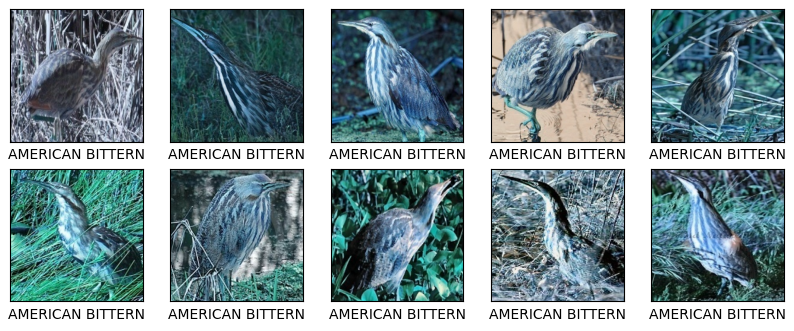

In [25]:
#Printing the first 25 images of the train dataset with its classification
#in grid of 5 by 5
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

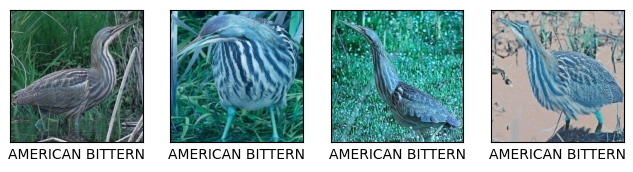

In [26]:
#Printing the first 25 images of the train dataset with its classification
#in grid of 5 by 5
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [27]:
#Reset and clear session
tf.keras.backend.clear_session

#Changing the precision to float16
#It is suficient since we are working with images with 8bits color deph for each channel
#It will reduce the memory amount and reduce the processing time
#policy = mixed_precision.Policy('mixed_float16')
#mixed_precision.set_global_policy(policy)

<function keras.backend.clear_session()>

In [28]:
#Converting to numpy array
train_images = np.array(train_images)
test_images = np.array(test_images)
#valid_images = np.array(valid_images)

# Converter train_labels para um NumPy array
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
#valid_labels = np.array(valid_labels)

In [29]:
#https://www.tensorflow.org/tutorials/images/classification?hl=pt-br
#tf.keras.backend.clear_session()

#model = keras.Sequential([
#  layers.Rescaling(1./255, input_shape=(height, width, channels)),
#  layers.Conv2D(16, 3, padding='same', activation='relu'),
#  layers.MaxPooling2D(),
#  layers.Conv2D(32, 3, padding='same', activation='relu'),
#  layers.MaxPooling2D(),
#  layers.Conv2D(64, 3, padding='same', activation='relu'),
#  layers.MaxPooling2D(),
#  layers.Flatten(),
#  layers.Dense(1000, activation='relu'),
#  layers.Dense(n_class, activation='softmax')
#])

In [30]:
#base_model = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(height, width, channels))
# Congele as camadas do modelo base
#for layer in base_model.layers:
#    layer.trainable = False
#
#strategy = tf.distribute.MirroredStrategy()

#with strategy.scope():
#    model = keras.Sequential([
#        #layers.Rescaling(1./255, input_shape=(height, width, channels)),
#        base_model,
#        layers.Flatten(),
#        layers.Dense(1000, activation='relu'),
#        layers.Dense(n_class, activation='softmax')
#])

In [31]:
# https://www.geeksforgeeks.org/multiclass-image-classification-using-transfer-learning/
# https://pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/

from tensorflow.keras.regularizers import l2

#Distribution strategy - This will enable TF to use CPU and GPU
strategy = tf.distribute.MirroredStrategy()

# Defining a function to create our model
def create_model():
    #base_model = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(height, width, channels))
    base_model = tf.keras.applications.InceptionV3(include_top= False,)
    
    #Freezing the Resnet50 model
    #for layer in base_model.layers:
    #    layer.trainable = False
    base_model.trainable = False

    model = keras.Sequential([
        layers.Rescaling(1./255, input_shape=(224, 224, 3)),            
        base_model,                
   
        layers.Conv2D(920, 3, padding='same', activation='relu'),   #Inception has a last conv layer with +1500 filters. This layer will simplify it to 920
        layers.BatchNormalization(),    
 
        
        layers.MaxPooling2D(name = "max_pooling_layer"),
        #layers.GlobalAveragePooling2D(name = "global_average_pooling_layer"),        
        layers.Flatten(),       
        
        layers.Dense(3312, activation='LeakyReLU'),  #2484  LeakyReLU
        layers.LeakyReLU(alpha=0.1),
        layers.Dropout(0.45),
        
        layers.Dense(1104, activation='LeakyReLU'),  #4
        layers.ELU(alpha=0.1),
        layers.Dropout(0.3),  

        #layers.Dense(920, activation='relu'),  #4
        #layers.Dropout(0.3),         
        
        layers.Dense(368, activation='relu'),  #4        
        layers.Dropout(0.25),   
        
       
        
        layers.Dense(n_class, activation='softmax', kernel_regularizer=l2(0.1))  #kernel_regularizer=l2(0.5)
    ])

    return model

# Creating the model
with strategy.scope():
    model = create_model()


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:CPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:CPU:0',).
INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/

In [32]:
model.compile(optimizer=tf.keras.optimizers.Adamax(),  
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy']
             )

In [33]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Data generator for data augmentation
datagen_augmented = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.25,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [34]:
#Training Batch size
batch_size = 32

# Batch generator for original images that will be used as validation
datagen_original = ImageDataGenerator()

# Batch generator for the augmented data and original data
generator_augmented = datagen_augmented.flow(train_images, train_labels, batch_size=batch_size, shuffle=True)
generator_original  = datagen_original.flow(train_images, train_labels, batch_size=batch_size, shuffle=True)


In [35]:
print(train_images.shape)
print(train_labels.shape)

(15107, 224, 224, 3)
(15107,)


In [36]:
from tensorflow.keras.callbacks import ModelCheckpoint

#fileame and path to save
checkpoint_path = 'checkpoint.h5'

# Creating model checkpoint
model_checkpoint = ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',  # Metric adopted
    save_best_only=True,  # Save only the best model
    mode='max',  # Use max for accuracy and min for loss
    verbose=1  
)

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

In [38]:
model.fit(
    generator_augmented, 
    #use_multiprocessing=True,
    steps_per_epoch=len(train_images) // batch_size, 
    epochs=60, 
    workers=8,                          #Number of threads
    validation_data=generator_original, #(valid_images, valid_labels)
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/60
472/472 [==============================] - ETA: 0s - loss: 8.1514 - accuracy: 0.2157
Epoch 1: val_accuracy improved from -inf to 0.54961, saving model to checkpoint.h5
472/472 [==============================] - 116s 221ms/step - loss: 8.1514 - accuracy: 0.2157 - val_loss: 3.7567 - val_accuracy: 0.5496
Epoch 2/60
472/472 [==============================] - ETA: 0s - loss: 3.3118 - accuracy: 0.4842
Epoch 2: val_accuracy improved from 0.54961 to 0.69120, saving model to checkpoint.h5
472/472 [==============================] - 101s 212ms/step - loss: 3.3118 - accuracy: 0.4842 - val_loss: 2.0241 - val_accuracy: 0.6912
Epoch 3/60
472/472 [==============================] - ETA: 0s - loss: 2.2212 - accuracy: 0.5871
Epoch 3: val_accuracy improved from 0.69120 to 0.75561, saving model to checkpoint.h5
472/472 [==============================] - 101s 213ms/step - loss: 2.2212 - accuracy: 0.5871 - val_loss: 1.3863 - val_accuracy: 0.7556
Epoch 4/60
472/472 [==============================] 

In [39]:
from tensorflow.keras.models import load_model

# Carregue o modelo a partir do arquivo de checkpoint
model_checkpoint = load_model('checkpoint.h5')

test_loss, test_acc_checkpoint = model_checkpoint.evaluate(test_images,  test_labels, verbose=2)



29/29 - 6s - loss: 0.3480 - accuracy: 0.9207 - 6s/epoch - 200ms/step


In [59]:
#Here, we can verify the accuracy of the trained model
#from keras.models import load_model
#model = load_model('AIBirdDetector_150.h5')
#model = load_model('AIBirdDetector_sk.h5')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)



29/29 - 3s - loss: 0.3480 - accuracy: 0.9207 - 3s/epoch - 90ms/step


In [60]:
print('\nCheckpoint accuracy:', test_acc_checkpoint)
print('Model accuracy:', test_acc)

if test_acc < test_acc_checkpoint:
    print('\nTest accuracy from Checkpoint is better:', test_acc_checkpoint)
else:
    print('\nTest accuracy from end model is better:', test_acc)


#model = model_checkpoint;
#test_acc = test_acc_checkpoint


Checkpoint accuracy: 0.9206521511077881
Model accuracy: 0.9206521511077881

Test accuracy from end model is better: 0.9206521511077881


In [61]:
#Checking the accuracy for each class to verify what is the worst
#Using this list, it's possible to understand what class needs to be reinforced with more/new images
#model = load_model('AIBirdDetector_sk.h5')

global_acc=test_acc
worst_images_classes = []
worst_labels_classes = []

z=0
wc = 0
acc = 0
for cls in  class_names:    
    test_images_classes = []
    test_labels_classes = []
    for i in range(len(test_labels)):        
        if class_names[test_labels[i]] == cls:
            if len(test_images) == 1:
                test_images_classes[0] = test_images[i]
                test_labels_classes[0] = test_labels[i]
            else:
                test_images_classes.append(test_images[i])
                test_labels_classes.append(test_labels[i])

    
    test_images_classes = np.array(test_images_classes)
    test_labels_classes = np.array(test_labels_classes)
    #print(test_labels_classes)
    test_acc = 0;
    test_loss, test_acc = model.evaluate(test_images_classes,  test_labels_classes, verbose=0)
    if test_acc < 0.89:
        print(str(cls) + ': ' + str(test_acc))  
        wc+=1

        #Catalog of the worst classes to train again
        for y in range(len(test_images_classes)):
            if len(test_images) == 1:            
                worst_images_classes[0] = test_images_classes[y]
                worst_labels_classes[0] = test_labels_classes[y]
            else:
                worst_images_classes.append(test_images_classes[y])
                worst_labels_classes.append(test_labels_classes[y])
        
    else:
        acc += test_acc
        z+=1
print('\nNumber of worst classes: ' +str(wc))
print('\nTotal Accuracy: ' + str(global_acc))
print('Accuracy without worst classes: ' + str(acc/z))

BREWERS BLACKBIRD: 0.4000000059604645
BROWN HEADED COWBIRD: 0.699999988079071
CANVASBACK: 0.800000011920929
GILDED FLICKER: 0.4000000059604645
HOUSE SPARROW: 0.699999988079071
JACOBIN PIGEON: 0.800000011920929
LOGGERHEAD SHRIKE: 0.800000011920929
RED HEADED DUCK: 0.800000011920929
RED TAILED HAWK: 0.6000000238418579
RED WINGED BLACKBIRD: 0.699999988079071
SANDHILL CRANE: 0.800000011920929
SAYS PHOEBE: 0.6000000238418579
SNOW GOOSE: 0.800000011920929
VEERY: 0.5
YELLOW BREASTED CHAT: 0.800000011920929
RED CROSSBILL: 0.6000000238418579

Number of worst classes: 16

Total Accuracy: 0.9206521511077881
Accuracy without worst classes: 0.9723684144647498


In [43]:
worst_images_classes = np.array(worst_images_classes)        
worst_labels_classes = np.array(worst_labels_classes)
print(worst_images_classes.shape)
print(worst_labels_classes.shape)

(160, 224, 224, 3)
(160,)


In [44]:
model.save('AIBirdDetector_sk.h5')

In [45]:
#Making some predctions based on the "test images" dataset
predictions = model.predict(test_images)

29/29 [==============================] - 4s 89ms/step


In [46]:
#Prediction will return an array with 100 positions, where each position is one class.
predictions[10]

array([2.87848909e-08, 9.99965191e-01, 5.88277777e-12, 4.00369127e-10,
       9.24168381e-11, 2.81035972e-09, 1.19398280e-07, 9.11704393e-11,
       1.01620913e-10, 3.88387456e-09, 7.52003348e-10, 5.42912267e-06,
       6.18730134e-09, 1.30788089e-06, 4.51071225e-09, 2.12255057e-11,
       1.29364921e-07, 4.07065735e-11, 4.99398689e-10, 1.74476475e-10,
       1.32781381e-07, 8.40185965e-09, 1.04055093e-08, 1.62973399e-10,
       5.39144118e-10, 1.25061504e-07, 1.45420256e-06, 8.09617859e-11,
       3.81287051e-11, 5.84809146e-10, 1.57837743e-08, 1.24386247e-07,
       5.75076609e-09, 1.70538883e-09, 6.24399907e-11, 3.02748870e-09,
       5.67229907e-09, 1.41722007e-11, 1.11414822e-09, 3.65209196e-09,
       1.38509160e-09, 2.56321409e-09, 9.80331705e-10, 1.29724408e-11,
       2.14829354e-09, 3.51168694e-09, 9.73967781e-12, 4.91022035e-07,
       1.06420683e-09, 1.95435068e-09, 8.38725622e-09, 1.30532798e-11,
       1.30813013e-10, 1.17301809e-07, 8.76901718e-10, 3.97207423e-09,
      

In [47]:
##### Checking the predction
np.argmax(predictions[10])

1

In [48]:
#We can also use it as the index of our class_names array and return the class...
class_names[np.argmax(predictions[10])]

'AMERICAN COOT'

In [49]:
class_names[test_labels[52]]

'AMERICAN ROBIN'

In [50]:
class_names[17]

'BROWN CREPPER'

In [51]:
pd.DataFrame(class_names).to_csv('class_names.csv')

In [52]:
for i in range(len(class_names)):
    print(class_names[i])

AMERICAN BITTERN
AMERICAN COOT
AMERICAN KESTREL
AMERICAN PIPIT
AMERICAN REDSTART
AMERICAN ROBIN
BALD EAGLE
BALTIMORE ORIOLE
BARN SWALLOW
BARROWS GOLDENEYE
BELTED KINGFISHER
BLACK NECKED STILT
BLACK-CAPPED CHICKADEE
BLACK-NECKED GREBE
BLUE HERON
BOBOLINK
BREWERS BLACKBIRD
BROWN CREPPER
BROWN HEADED COWBIRD
BROWN THRASHER
BUFFLEHEAD
CALIFORNIA GULL
CANVASBACK
CEDAR WAXWING
CHIPPING SPARROW
CINNAMON TEAL
CLARKS GREBE
COMMON GRACKLE
COMMON LOON
COMMON STARLING
CRESTED NUTHATCH
DARK EYED JUNCO
DOUBLE BRESTED CORMARANT
DOWNY WOODPECKER
EASTERN BLUEBIRD
EASTERN TOWEE
EURASIAN MAGPIE
GILDED FLICKER
GOLDEN EAGLE
GRAY CATBIRD
GRAY PARTRIDGE
GREATOR SAGE GROUSE
GREY PLOVER
GYRFALCON
HARLEQUIN DUCK
HOODED MERGANSER
HORNED LARK
HOUSE SPARROW
JACOBIN PIGEON
KILLDEAR
LARK BUNTING
LAZULI BUNTING
LOGGERHEAD SHRIKE
LONG-EARED OWL
MALLARD DUCK
MERLIN
MOURNING DOVE
NORTHERN FLICKER
NORTHERN GOSHAWK
OSPREY
PAINTED BUNTING
PEREGRINE FALCON
PURPLE MARTIN
RED HEADED DUCK
RED HEADED WOODPECKER
RED KNOT
RED TAI